# Random Walk Simple Example

Here's a simple example where we produce a set of plots, called a tear sheet, for a single stock.

Small demonstration of the `pyfolio` library. We will use the `GBPUSD` exchange rate to show the basic functionality of the library.

In [1]:
# silence warnings raised by the pyfolio library.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf
import pyfolio as pf
import pandas as pd
import os
import numpy as np

In [3]:
s = yf.download(
    tickers='GBPUSD=X',
    start='2003-11-01'
)

[*********************100%%**********************]  1 of 1 completed


In [4]:
# Drop timezone information to avoid errors with pyfolio.
s.index = s.index.tz_localize('utc')

In [5]:
# Calculating the returns as the percentage change of the close
# exchange rate.
s_returns = s.Close.pct_change()

The signal of the strategy is calculated as follows:

$$
signal_t = \begin{cases}
    1 &  \%\Delta \hat{s}_{t} > 0 \\
    -1 &  \%\Delta \hat{s}_{t} < 0 \\
\end{cases}
$$

Where $\%\Delta \hat{s}_{t}$ is forecasted percentage change of the exchange rate at time $t$ given the information available at time $t-1$.

The random walk model is defined as:

$$
\% \Delta s_{t} = \% \Delta s_{t-1} + \epsilon_{t}
$$

where 

$$
\%\Delta \hat{s}_{t} = \% \Delta s_{t-1}
$$

The returns of the random walk strategy are calculated as follows:

$$
r^{rw}_{t} = signal_{t} \times \%\Delta s_{t}
$$

In [6]:
rw_returns = (
    s_returns.shift(1)
    .pipe(np.sign)
    .pipe(lambda x: x * s_returns)
    .dropna()
)

Start date,2003-12-03
End date,2024-02-15
Total months,250
,Backtest
Annual return,0.696%
Cumulative returns,15.565%
Annual volatility,9.469%
Sharpe ratio,0.12
Calmar ratio,0.02
Stability,0.53
Max drawdown,-34.989%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.99,2004-01-19,2008-08-01,2010-05-14,1650
1,24.58,2010-12-02,2015-04-10,2016-07-08,1462
2,24.55,2020-08-19,2023-05-23,NaT,NaN
3,14.45,2017-01-31,2019-03-25,2020-03-12,813
4,8.76,2016-07-13,2016-10-11,2017-01-31,145


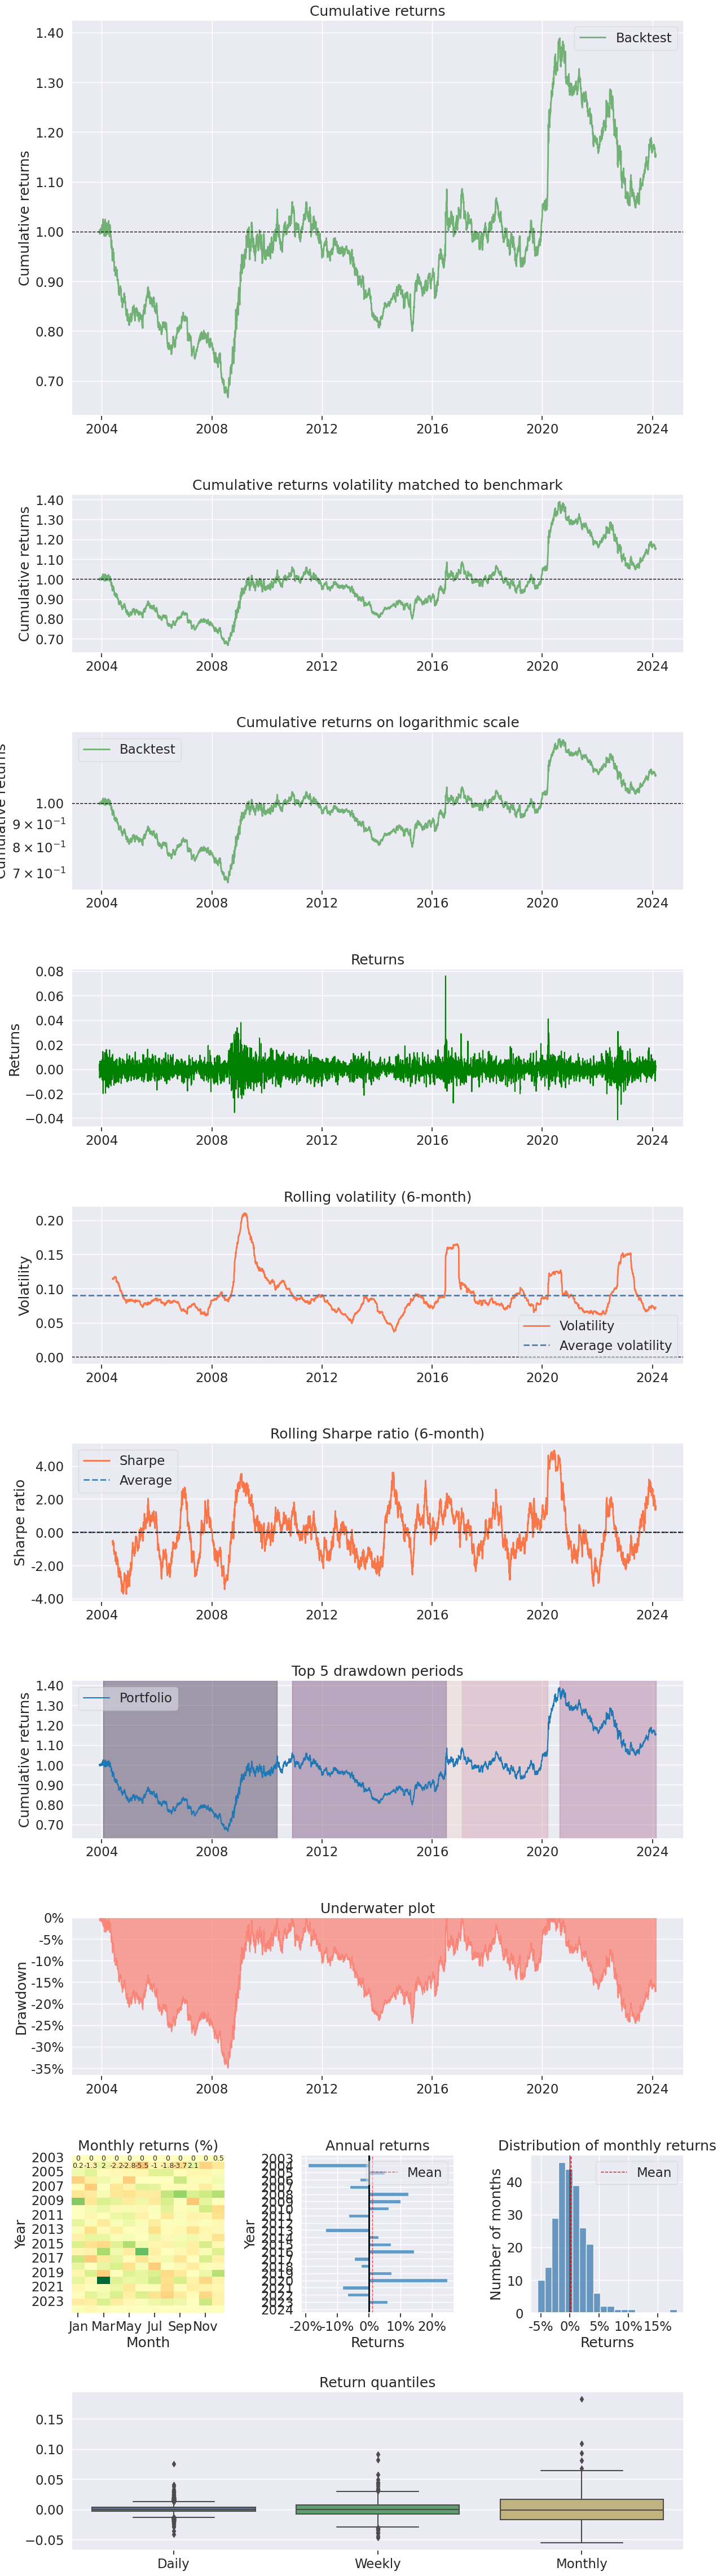

In [7]:
# Tear sheet for the random walk strategy. No live trading is defined.
pf.create_returns_tear_sheet(rw_returns)